## Mathematical Operations in Numpy 

Numpy has a lot of built in flexibility when it comes to doing math.  The most obvious thing you might want to do is to treat numpy arrays as matrixes or vectors, depending on the circumstance.  The recommend way to do this is to use the functions that specify vector multiplication: 

In [1]:
import numpy as np

In [2]:
A = np.linspace(1,9,9)
B=A.reshape((3,3))

In [3]:
print(B)
print(B*B) # elementwise multiplication

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.  4.  9.]
 [16. 25. 36.]
 [49. 64. 81.]]


In [4]:
print(np.dot(B,B)) #matix multiplication

[[ 30.  36.  42.]
 [ 66.  81.  96.]
 [102. 126. 150.]]


In [5]:
print(np.dot(A,A)) # vector dot product

285.0


In [6]:
print(np.dot(np.array((1,2,3)),B)) # left multiplication

[30. 36. 42.]


In [7]:
print(np.dot(B,np.array((1,2,3)))) # right multiplication

[14. 32. 50.]


In [8]:
C=B+np.identity(3) # matrix addition acts as usual

print C
print np.linalg.inv(C) # matrix inverse

In [9]:
np.dot(C,np.linalg.inv(C))

array([[ 1.00000000e+00, -2.22044605e-16,  4.44089210e-16],
       [-1.77635684e-15,  1.00000000e+00,  8.88178420e-16],
       [-1.77635684e-15,  4.44089210e-16,  1.00000000e+00]])

## Random Numbers

Generating random numbers is an extremely useful tool in scientific computing.  We will see some applications in a second, but first let's just get the syntax.  

The first thing you might want is a random number drawn from a uniform probability between 0 and 1

In [10]:
np.random.rand()

0.4156800996441471

This function actually will give you a bunch of random numbers in any shape 

In [11]:
np.random.rand(10)

array([0.315345  , 0.98497904, 0.7060787 , 0.89070041, 0.76223601,
       0.55038251, 0.27136846, 0.77356905, 0.40323993, 0.3762723 ])

In [12]:
np.random.rand(2,2,2)

array([[[0.91343303, 0.81715274],
        [0.32642239, 0.30655226]],

       [[0.54951497, 0.29340025],
        [0.4986291 , 0.5452359 ]]])

Given such a distribution, we can make our own function to cover any uniform distibution:

In [13]:
def my_uniform(low,high,number):
    out=np.random.rand(number)
    out*=(high-low)
    out+=low
    return out

In [14]:
my_uniform(10,11,20)

array([10.14295098, 10.18843724, 10.17980418, 10.07164425, 10.69997844,
       10.56266348, 10.7522452 , 10.97192137, 10.94867013, 10.63441027,
       10.48526025, 10.19009625, 10.69732338, 10.21439125, 10.93659721,
       10.7808468 , 10.96273196, 10.21975255, 10.83632473, 10.44360184])

In [15]:
my_uniform(-102.3,99.2,20)

array([ 45.05640311,  96.75481718, -37.37842354,  51.77737662,
       -30.35705235,  17.09989104, -23.85665422,  32.42656257,
        10.78316734, -79.53457218, -25.92205644,   3.99799985,
       -45.47226866,  91.4368771 ,  64.68365817, -68.09197264,
        92.59599788,  73.06042583, -38.32122347, -50.17744904])

naturally, numpy has its own version of this function

In [16]:
np.random.uniform(-102.3,99.2,20)

array([-43.38639774, -24.4168048 , -50.30729982, -25.70345776,
        13.96151987,  68.63804564, -15.96813599, -57.12663267,
        90.6708544 , -33.74485849, -33.16632769,  61.77847683,
       -49.54390463,  14.04526226, -58.10523091, -58.38797143,
        70.52549003, -78.03067824,  48.74336058,  88.74032801])

However, it is important to realize that once you have a source of random numbers, you can mold it to do other things you want

The other common kind of random number you will want is one drawn from a normal distibution.  This means the probability (density) of drawing the number x is $P(x) = e^{-(x-\mu)^2/2\sigma^2}/\sqrt{2\pi \sigma^2}$.  The number $\mu$ is called the mean and $\sigma$ is the variance. 

Python has a nice way of generating numbers with $\mu =0$ and $\sigma=1$:

In [17]:
np.random.randn(10)

array([-2.81826074,  0.96625231, -0.52275204,  1.45525171, -0.03335625,
       -0.24611062,  0.26356488, -0.11607747,  1.65195214,  0.88484359])

Let's make a histogram to see what this is doing:

In [18]:
import matplotlib.pyplot as plt

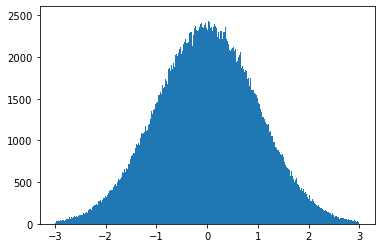

In [19]:
plt.hist(np.random.randn(1000000),bins=np.linspace(-3,3,1000))
plt.show()

In [20]:
np.random.randint(3,size=100)

array([2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2,
       2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0,
       2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1])

In [21]:
np.random.randint(2,size=10).sum()

4

In [22]:
number_of_flips=10
number_of_trails=1000
results=np.zeros(number_of_trails)
for i in range(number_of_trails):
    results[i]=np.random.randint(2,size=number_of_flips).sum()/float(number_of_flips)

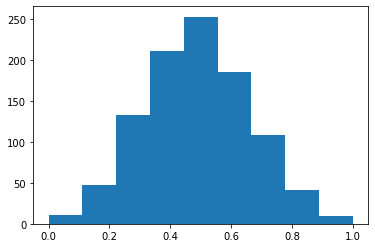

In [27]:
plt.hist(results,bins=np.linspace(0,1,10))
plt.show()

## Demonstration: calculating $\pi$

To get a quick sense of why this is useful, we can demonstrate how we can calculate $\pi$ using what we have just learned.  This will actually serve as an important example of a much broader and more powerful set of techniques later in the course, but for now it is just to give you a taste of how these things can work for you.

The idea is the following: image you pick a point randomly inside a square of length 2 on each side.  The area of this square is 4.  I circle placed within the square with radius 1 has area $\pi$.  If a random draw numbers that land inside the square with a uniform probability, then $\pi/4$ of them (on average) should also be inside the circle.  Said different, after picking a point in the square, we ask if it is also in the circle and keep track.  At the end we take number in circle / total we have caculated $\pi/4$

In [28]:
def pi_calculator(N):
    x=np.random.uniform(-1,1,N)  # make a list of N random numbers of x-axis of box
    y=np.random.uniform(-1,1,N) # make a list of N random numbers of y-axis of box
    z=(x**2+y**2<1) # make a list of every time x^2 + y^2 < 1 (inside the cicle)
    return z.sum()/float(N)*4 # add all the points in the circle up and return 4*cicle/N

In [29]:
pi_calculator(10**7)

3.142122

In [30]:
pi_calculator(10**8)

3.14184244

In [31]:
pi_calculator(10**9)

3.141648488

In [39]:
x=np.random.uniform(-1,1,5)
y=np.random.uniform(-1,1,5)
z=(x**2+y**2<1)

In [43]:
print(x,y)
print(x**2+y**2)
print(z)

[-0.46261577  0.93124438  0.74169432  0.45117097  0.1718111 ] [ 0.89592606  0.11286007 -0.40097035  0.9466685  -0.91434233]
[1.01669686 0.87995349 0.71088768 1.09973649 0.86554094]
[False  True  True False  True]


In [44]:
z.sum()

3

To see how this is working, let's write a slower version to see the steps

In [45]:
def pi_slow(N):
    circle=0
    for i in range(N):
        x=np.random.uniform(-1,1,1)  # pick a x coordinate in the box
        y=np.random.uniform(-1,1,1) # pick a y coordinate in the box
        if x**2+y**2<1: # make a list of every time x^2 + y^2 < 1 (inside the cicle)
            circle+=1 
    return 4*circle/N # add all the points in the circle up and return 4*cicle/N

In [46]:
pi_slow(10**6)

3.14284

In [47]:
pi_calculator(10**8)

3.14165004

The slow implementation makes it clear what we are doing, but it clearly takes much longer.

In [48]:
import time

In [50]:
t1 = time.time()
pi_slow(1000000)
print(time.time() - t1)

9.319647073745728


In [51]:
t1 = time.time()
pi_calculator(1000000)
print(time.time() - t1)

0.0646061897277832


Anticipating something we will discuss later, now let's see how our error in the measurement of pi scales with the number of random points we pick

In [52]:
short=int(10**6)
medium=int(10**7)
Long=int(10**(8))
trials=100
pi_list_short=np.zeros(trials)
pi_list_medium=np.zeros(trials)
pi_list_Long=np.zeros(trials)
for i in range(trials):
    pi_list_short[i]=pi_calculator(short)
    pi_list_medium[i]=pi_calculator(medium)
    pi_list_Long[i]=pi_calculator(Long)

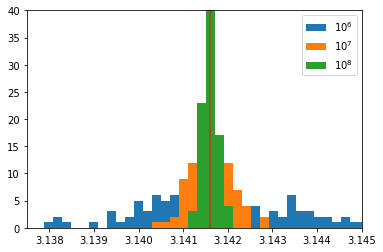

In [58]:
fig, ax = plt.subplots()
p1=ax.hist(pi_list_short,bins=np.linspace(3.13,3.15,100),label='$10^6$')
p2=ax.hist(pi_list_medium,bins=np.linspace(3.13,3.15,100),label='$10^7$')
p3=ax.hist(pi_list_Long,bins=np.linspace(3.13,3.15,100),label='$10^8$')
ax.plot([np.pi,np.pi],[0,40])
plt.ylim(0,40)
plt.xlim(3.1375,3.145)
leg = ax.legend()
plt.show()

By eye, it looks like the blue is a approximately 10 times wider than the green.  This would make sense if the error on the value of $\pi$ decreased by $1/\sqrt{N}$ where $N$ is the number of random points used in the calculation.  This is indeed what is going on and is a much more general fact about random numbers.

### Summary

Numpy has a number of basic math operations we will make a lot of use off.  Random numbers are a particularly valuable tool that is employed in all areas of science and engineering.  E.g. simulating the behavior of any measurement involves adding random numbers to you signal.  We can always use the output of the random number library to create the type of noise we want for a given application.  